Importations et chargement des données : 

In [4]:
import os, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
processed_dir = "../data/processed" 

x_path = os.path.join(processed_dir, "x_train_clean.csv")
y_path = os.path.join(processed_dir, "y_target.csv")
ys_path = os.path.join(processed_dir, "y_train_supp_aligned.csv")

X = pd.read_csv(x_path)
y = pd.read_csv(y_path)
ys = pd.read_csv(ys_path) if os.path.exists(ys_path) else None

print("Shapes:", X.shape, y.shape, None if ys is None else ys.shape)
X.head(5)


Shapes: (12303, 3170) (12303, 2) (12303, 2)


,id,home_team_TEAM_SHOTS_TOTAL_season_sum,home_team_TEAM_SHOTS_INSIDEBOX_season_sum,home_team_TEAM_SHOTS_OFF_TARGET_season_sum,home_team_TEAM_SHOTS_ON_TARGET_season_sum,home_team_TEAM_SHOTS_OUTSIDEBOX_season_sum,home_team_TEAM_PASSES_season_sum,home_team_TEAM_SUCCESSFUL_PASSES_season_sum,home_team_TEAM_SAVES_season_sum,home_team_TEAM_CORNERS_season_sum,home_team_TEAM_FOULS_season_sum,home_team_TEAM_YELLOWCARDS_season_sum,home_team_TEAM_REDCARDS_season_sum,home_team_TEAM_OFFSIDES_season_sum,home_team_TEAM_ATTACKS_season_sum,home_team_TEAM_PENALTIES_season_sum,home_team_TEAM_SUBSTITUTIONS_season_sum,home_team_TEAM_BALL_SAFE_season_sum,home_team_TEAM_DANGEROUS_ATTACKS_season_sum,home_team_TEAM_INJURIES_season_sum,home_team_TEAM_GOALS_season_sum,home_team_TEAM_GAME_WON_season_sum,home_team_TEAM_GAME_DRAW_season_sum,home_team_TEAM_GAME_LOST_season_sum,home_team_TEAM_SHOTS_TOTAL_season_average,home_team_TEAM_SHOTS_INSIDEBOX_season_average,home_team_TEAM_SHOTS_OFF_TARGET_season_average,home_team_TEAM_SHOTS_ON_TARGET_season_average,home_team_TEAM_SHOTS_OUTSIDEBOX_season_average,home_team_TEAM_PASSES_season_average,home_team_TEAM_SUCCESSFUL_PASSES_season_average,home_team_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,home_team_TEAM_SAVES_season_average,home_team_TEAM_CORNERS_season_average,home_team_TEAM_BALL_POSSESSION_season_average,home_team_TEAM_FOULS_season_average,home_team_TEAM_YELLOWCARDS_season_average,home_team_TEAM_REDCARDS_season_average,home_team_TEAM_OFFSIDES_season_average,home_team_TEAM_ATTACKS_season_average,home_team_TEAM_PENALTIES_season_average,home_team_TEAM_SUBSTITUTIONS_season_average,home_team_TEAM_BALL_SAFE_season_average,home_team_TEAM_DANGEROUS_ATTACKS_season_average,home_team_TEAM_INJURIES_season_average,home_team_TEAM_GOALS_season_average,home_team_TEAM_GAME_WON_season_average,home_team_TEAM_GAME_DRAW_season_average,home_team_TEAM_GAME_LOST_season_average,home_team_TEAM_SHOTS_TOTAL_season_std,home_team_TEAM_SHOTS_INSIDEBOX_season_std,home_team_TEAM_SHOTS_OFF_TARGET_season_std,home_team_TEAM_SHOTS_ON_TARGET_season_std,home_team_TEAM_SHOTS_OUTSIDEBOX_season_std,home_team_TEAM_PASSES_season_std,home_team_TEAM_SUCCESSFUL_PASSES_season_std,home_team_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,home_team_TEAM_SAVES_season_std,home_team_TEAM_CORNERS_season_std,home_team_TEAM_BALL_POSSESSION_season_std,...,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_sum,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_std,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_max,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_mean,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_sum,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_std,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_max,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_median,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_mean,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_sum,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_std,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_max,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_median,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_mean,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_sum,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_std,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_max,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_median,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_mean,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_sum,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_std,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_min,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_max,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_median,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_mean,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_sum,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_std,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_max,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_median,

Merge des données d'entrainement :

In [5]:
df = X.merge(y, on="id", how="left")
if ys is not None:
    df = df.merge(ys, on="id", how="left")
print(df.shape)
df.head(5)


(12303, 3172)


,id,home_team_TEAM_SHOTS_TOTAL_season_sum,home_team_TEAM_SHOTS_INSIDEBOX_season_sum,home_team_TEAM_SHOTS_OFF_TARGET_season_sum,home_team_TEAM_SHOTS_ON_TARGET_season_sum,home_team_TEAM_SHOTS_OUTSIDEBOX_season_sum,home_team_TEAM_PASSES_season_sum,home_team_TEAM_SUCCESSFUL_PASSES_season_sum,home_team_TEAM_SAVES_season_sum,home_team_TEAM_CORNERS_season_sum,home_team_TEAM_FOULS_season_sum,home_team_TEAM_YELLOWCARDS_season_sum,home_team_TEAM_REDCARDS_season_sum,home_team_TEAM_OFFSIDES_season_sum,home_team_TEAM_ATTACKS_season_sum,home_team_TEAM_PENALTIES_season_sum,home_team_TEAM_SUBSTITUTIONS_season_sum,home_team_TEAM_BALL_SAFE_season_sum,home_team_TEAM_DANGEROUS_ATTACKS_season_sum,home_team_TEAM_INJURIES_season_sum,home_team_TEAM_GOALS_season_sum,home_team_TEAM_GAME_WON_season_sum,home_team_TEAM_GAME_DRAW_season_sum,home_team_TEAM_GAME_LOST_season_sum,home_team_TEAM_SHOTS_TOTAL_season_average,home_team_TEAM_SHOTS_INSIDEBOX_season_average,home_team_TEAM_SHOTS_OFF_TARGET_season_average,home_team_TEAM_SHOTS_ON_TARGET_season_average,home_team_TEAM_SHOTS_OUTSIDEBOX_season_average,home_team_TEAM_PASSES_season_average,home_team_TEAM_SUCCESSFUL_PASSES_season_average,home_team_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,home_team_TEAM_SAVES_season_average,home_team_TEAM_CORNERS_season_average,home_team_TEAM_BALL_POSSESSION_season_average,home_team_TEAM_FOULS_season_average,home_team_TEAM_YELLOWCARDS_season_average,home_team_TEAM_REDCARDS_season_average,home_team_TEAM_OFFSIDES_season_average,home_team_TEAM_ATTACKS_season_average,home_team_TEAM_PENALTIES_season_average,home_team_TEAM_SUBSTITUTIONS_season_average,home_team_TEAM_BALL_SAFE_season_average,home_team_TEAM_DANGEROUS_ATTACKS_season_average,home_team_TEAM_INJURIES_season_average,home_team_TEAM_GOALS_season_average,home_team_TEAM_GAME_WON_season_average,home_team_TEAM_GAME_DRAW_season_average,home_team_TEAM_GAME_LOST_season_average,home_team_TEAM_SHOTS_TOTAL_season_std,home_team_TEAM_SHOTS_INSIDEBOX_season_std,home_team_TEAM_SHOTS_OFF_TARGET_season_std,home_team_TEAM_SHOTS_ON_TARGET_season_std,home_team_TEAM_SHOTS_OUTSIDEBOX_season_std,home_team_TEAM_PASSES_season_std,home_team_TEAM_SUCCESSFUL_PASSES_season_std,home_team_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,home_team_TEAM_SAVES_season_std,home_team_TEAM_CORNERS_season_std,home_team_TEAM_BALL_POSSESSION_season_std,...,away_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_max,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_mean,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_sum,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_std,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_max,away_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_median,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_mean,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_sum,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_std,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_max,away_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_median,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_mean,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_sum,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_std,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_max,away_player_PLAYER_SHOTS_TOTAL_5_last_match_std_median,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_mean,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_sum,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_std,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_min,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_max,away_player_PLAYER_STARTING_LINEUP_5_last_match_std_median,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_mean,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_sum,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_std,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_max,away_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_median,away_player_PLAYER_TACKLES_5_last_match_std_mean,away_player_PLAYER_TACKLES_5_last_match_std_sum,away_player_PLAYE

Verification de la presence d'infos manquantes :

In [8]:
miss = df.isna().mean().sort_values(ascending=False)
miss = miss[miss > 0]

if miss.empty:
    print("Aucune valeur manquante après prétraitement (imputation OK).")
else:
    display(miss.head(30))
    import matplotlib.pyplot as plt
    plt.figure()
    miss.head(30).plot(kind="bar")
    plt.title("Top 30 features by missing ratio")
    plt.tight_layout()
    plt.show()


Aucune valeur manquante après prétraitement (imputation OK).


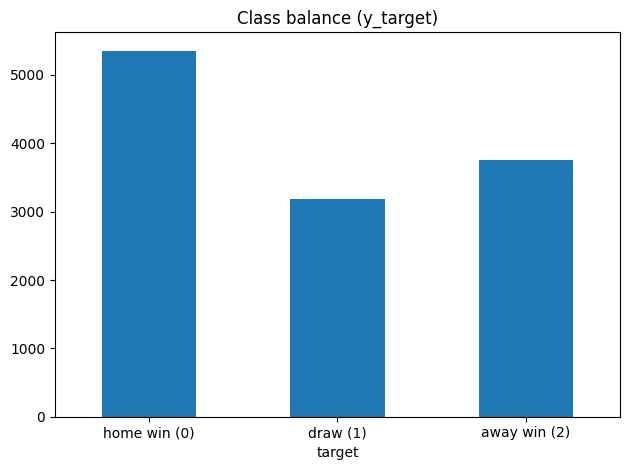

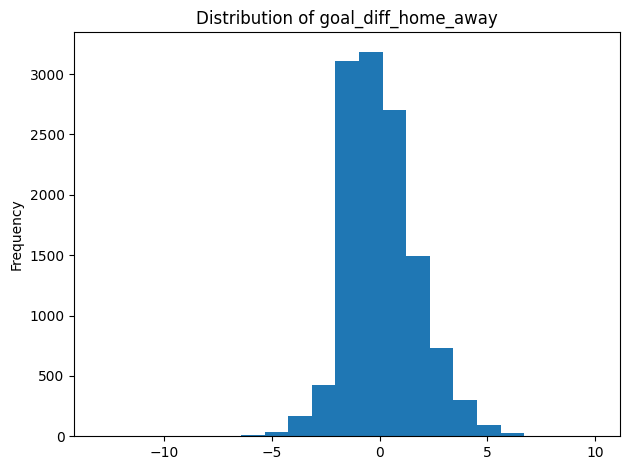

In [9]:
vc = y['target'].value_counts().sort_index()
labels = ["home win (0)", "draw (1)", "away win (2)"]
plt.figure()
vc.plot(kind="bar")
plt.xticks(ticks=range(len(vc)), labels=labels[:len(vc)], rotation=0)
plt.title("Class balance (y_target)")
plt.tight_layout()
plt.show()

# goal difference distribution (support labels)
if ys is not None and 'goal_diff_home_away' in ys.columns:
    plt.figure()
    ys['goal_diff_home_away'].plot(kind="hist", bins=21)
    plt.title("Distribution of goal_diff_home_away")
    plt.tight_layout()
    plt.show()

In [10]:
# Automatically compute 'home - away' differences for features that come in pairs.
home_cols = [c for c in X.columns if c.startswith('home_') and c != 'id']
diff_cols = []
for hc in home_cols:
    ac = 'away_' + hc[len('home_'):]
    if ac in X.columns:
        diff_name = 'diff_' + hc[len('home_'):]
        df[diff_name] = X[hc] - X[ac]
        diff_cols.append(diff_name)

print(f"Created {len(diff_cols)} home-away diff features")
df[diff_cols].head(5) if len(diff_cols) else df.head(3)


C:\Users\clem7\AppData\Local\Temp\ipykernel_3680\4000194590.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[diff_name] = X[hc] - X[ac]
C:\Users\clem7\AppData\Local\Temp\ipykernel_3680\4000194590.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[diff_name] = X[hc] - X[ac]
C:\Users\clem7\AppData\Local\Temp\ipykernel_3680\4000194590.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

Created 1575 home-away diff features


,diff_team_TEAM_SHOTS_TOTAL_season_sum,diff_team_TEAM_SHOTS_INSIDEBOX_season_sum,diff_team_TEAM_SHOTS_OFF_TARGET_season_sum,diff_team_TEAM_SHOTS_ON_TARGET_season_sum,diff_team_TEAM_SHOTS_OUTSIDEBOX_season_sum,diff_team_TEAM_PASSES_season_sum,diff_team_TEAM_SUCCESSFUL_PASSES_season_sum,diff_team_TEAM_SAVES_season_sum,diff_team_TEAM_CORNERS_season_sum,diff_team_TEAM_FOULS_season_sum,diff_team_TEAM_YELLOWCARDS_season_sum,diff_team_TEAM_REDCARDS_season_sum,diff_team_TEAM_OFFSIDES_season_sum,diff_team_TEAM_ATTACKS_season_sum,diff_team_TEAM_PENALTIES_season_sum,diff_team_TEAM_SUBSTITUTIONS_season_sum,diff_team_TEAM_BALL_SAFE_season_sum,diff_team_TEAM_DANGEROUS_ATTACKS_season_sum,diff_team_TEAM_INJURIES_season_sum,diff_team_TEAM_GOALS_season_sum,diff_team_TEAM_GAME_WON_season_sum,diff_team_TEAM_GAME_DRAW_season_sum,diff_team_TEAM_GAME_LOST_season_sum,diff_team_TEAM_SHOTS_TOTAL_season_average,diff_team_TEAM_SHOTS_INSIDEBOX_season_average,diff_team_TEAM_SHOTS_OFF_TARGET_season_average,diff_team_TEAM_SHOTS_ON_TARGET_season_average,diff_team_TEAM_SHOTS_OUTSIDEBOX_season_average,diff_team_TEAM_PASSES_season_average,diff_team_TEAM_SUCCESSFUL_PASSES_season_average,diff_team_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,diff_team_TEAM_SAVES_season_average,diff_team_TEAM_CORNERS_season_average,diff_team_TEAM_BALL_POSSESSION_season_average,diff_team_TEAM_FOULS_season_average,diff_team_TEAM_YELLOWCARDS_season_average,diff_team_TEAM_REDCARDS_season_average,diff_team_TEAM_OFFSIDES_season_average,diff_team_TEAM_ATTACKS_season_average,diff_team_TEAM_PENALTIES_season_average,diff_team_TEAM_SUBSTITUTIONS_season_average,diff_team_TEAM_BALL_SAFE_season_average,diff_team_TEAM_DANGEROUS_ATTACKS_season_average,diff_team_TEAM_INJURIES_season_average,diff_team_TEAM_GOALS_season_average,diff_team_TEAM_GAME_WON_season_average,diff_team_TEAM_GAME_DRAW_season_average,diff_team_TEAM_GAME_LOST_season_average,diff_team_TEAM_SHOTS_TOTAL_season_std,diff_team_TEAM_SHOTS_INSIDEBOX_season_std,diff_team_TEAM_SHOTS_OFF_TARGET_season_std,diff_team_TEAM_SHOTS_ON_TARGET_season_std,diff_team_TEAM_SHOTS_OUTSIDEBOX_season_std,diff_team_TEAM_PASSES_season_std,diff_team_TEAM_SUCCESSFUL_PASSES_season_std,diff_team_TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,diff_team_TEAM_SAVES_season_std,diff_team_TEAM_CORNERS_season_std,diff_team_TEAM_BALL_POSSESSION_season_std,diff_team_TEAM_FOULS_season_std,...,diff_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_sum,diff_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_std,diff_player_PLAYER_SAVES_INSIDE_BOX_5_last_match_std_max,diff_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_mean,diff_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_sum,diff_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_std,diff_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_max,diff_player_PLAYER_SHOTS_BLOCKED_5_last_match_std_median,diff_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_mean,diff_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_sum,diff_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_std,diff_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_max,diff_player_PLAYER_SHOTS_ON_TARGET_5_last_match_std_median,diff_player_PLAYER_SHOTS_TOTAL_5_last_match_std_mean,diff_player_PLAYER_SHOTS_TOTAL_5_last_match_std_sum,diff_player_PLAYER_SHOTS_TOTAL_5_last_match_std_std,diff_player_PLAYER_SHOTS_TOTAL_5_last_match_std_max,diff_player_PLAYER_SHOTS_TOTAL_5_last_match_std_median,diff_player_PLAYER_STARTING_LINEUP_5_last_match_std_mean,diff_player_PLAYER_STARTING_LINEUP_5_last_match_std_sum,diff_player_PLAYER_STARTING_LINEUP_5_last_match_std_std,diff_player_PLAYER_STARTING_LINEUP_5_last_match_std_min,diff_player_PLAYER_STARTING_LINEUP_5_last_match_std_max,diff_player_PLAYER_STARTING_LINEUP_5_last_match_std_median,diff_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_mean,diff_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_sum,diff_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_std,diff_player_PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std_max,diff_player_PLAYER_SUCCESSFUL_DRIB

diff_team_TEAM_SHOTS_INSIDEBOX_season_average        0.268782
diff_team_TEAM_SHOTS_INSIDEBOX_season_sum            0.265453
diff_team_TEAM_GAME_WON_season_average               0.262684
diff_team_TEAM_GAME_WON_season_sum                   0.260354
diff_team_TEAM_SHOTS_ON_TARGET_season_average        0.259869
diff_team_TEAM_SHOTS_ON_TARGET_season_sum            0.256665
diff_team_TEAM_GOALS_season_average                  0.256561
diff_team_TEAM_GOALS_season_sum                      0.254918
diff_team_TEAM_BALL_POSSESSION_season_average        0.254197
diff_team_TEAM_SHOTS_TOTAL_season_average            0.253200
diff_team_TEAM_GAME_LOST_season_average              0.249857
diff_team_TEAM_SHOTS_TOTAL_season_sum                0.249332
diff_team_TEAM_GAME_LOST_season_sum                  0.248337
diff_player_PLAYER_GOALS_season_sum_sum              0.245470
diff_player_PLAYER_ASSISTS_season_sum_sum            0.244130
diff_player_PLAYER_KEY_PASSES_season_average_sum     0.243901
diff_pla

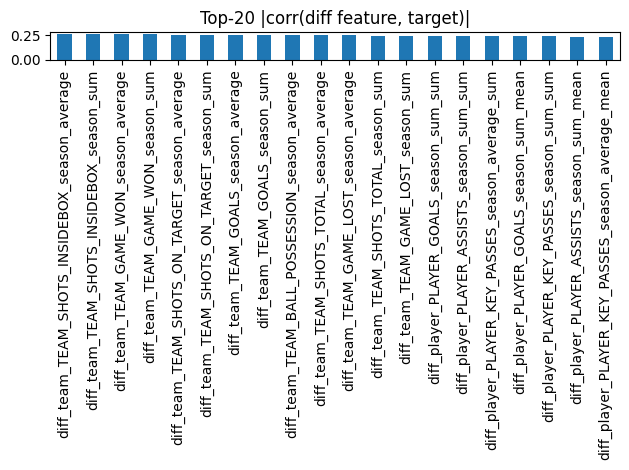

In [11]:
# Correlation between each diff feature and the target (absolute)
if 'target' in df.columns and len(diff_cols):
    corr = {}
    for c in diff_cols:
        if df[c].dtype.kind in 'biufc':
            corr[c] = abs(np.corrcoef(df[c].fillna(0), df['target'])[0,1])
    corr = pd.Series(corr).sort_values(ascending=False)

    topk = corr.head(20)
    display(topk)

    plt.figure()
    topk.plot(kind="bar")
    plt.title("Top-20 |corr(diff feature, target)|")
    plt.tight_layout()
    plt.show()
else:
    print("No diff features or target not available.")


diff_team_TEAM_SHOTS_INSIDEBOX_season_average        0.268782
diff_team_TEAM_SHOTS_INSIDEBOX_season_sum            0.265453
diff_team_TEAM_GAME_WON_season_average               0.262684
diff_team_TEAM_GAME_WON_season_sum                   0.260354
diff_team_TEAM_SHOTS_ON_TARGET_season_average        0.259869
diff_team_TEAM_SHOTS_ON_TARGET_season_sum            0.256665
diff_team_TEAM_GOALS_season_average                  0.256561
diff_team_TEAM_GOALS_season_sum                      0.254918
diff_team_TEAM_BALL_POSSESSION_season_average        0.254197
diff_team_TEAM_SHOTS_TOTAL_season_average            0.253200
diff_team_TEAM_GAME_LOST_season_average              0.249857
diff_team_TEAM_SHOTS_TOTAL_season_sum                0.249332
diff_team_TEAM_GAME_LOST_season_sum                  0.248337
diff_player_PLAYER_GOALS_season_sum_sum              0.245470
diff_player_PLAYER_ASSISTS_season_sum_sum            0.244130
diff_player_PLAYER_KEY_PASSES_season_average_sum     0.243901
diff_pla

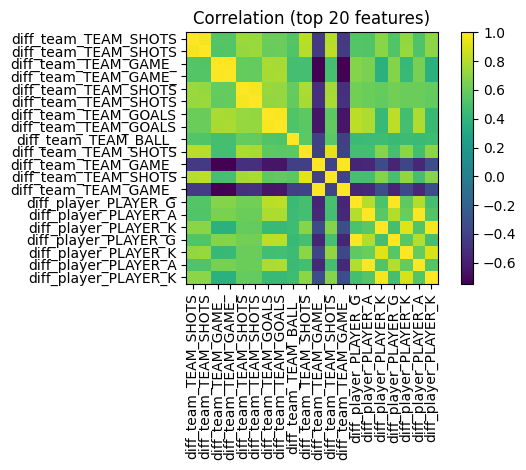

In [12]:
# Top 20 features overall by absolute correlation with target (not only diffs)
num_cols = [c for c in df.columns if c not in ['id', 'target', 'goal_diff_home_away'] and df[c].dtype.kind in 'biufc']
corr_all = {}
for c in num_cols:
    corr_all[c] = abs(np.corrcoef(df[c].fillna(0), df['target'])[0,1])
corr_all = pd.Series(corr_all).sort_values(ascending=False)

top20_cols = list(corr_all.head(20).index)
display(corr_all.head(20))

# small correlation matrix of those top features
C = df[top20_cols].corr()
plt.figure()
plt.imshow(C, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(top20_cols)), [c[:20] for c in top20_cols], rotation=90)
plt.yticks(range(len(top20_cols)), [c[:20] for c in top20_cols])
plt.title("Correlation (top 20 features)")
plt.tight_layout()
plt.show()
